<a href="https://colab.research.google.com/github/vedantdave77/Udacity_Nueral_network_pytorch/blob/master/Convolution_layer_Process_Visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Load image data and preprocessing

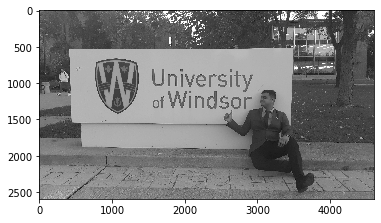

In [30]:
my_image = cv2.imread('me.jpg')
gray_image = cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)
gray_image = gray_image.astype('float32')/255

plt.imshow(gray_image, cmap = 'gray')
plt.show()

Define and visulize the filter

In [46]:
import numpy as np

filter_vals = np.array([[-1,-1,0.2,1],[-1,-1,0.2,1],[-1,-1,-0.2,1],[-1,-1,-0.2,1]])
print('Filger_shape' , filter_vals.shape)

Filger_shape (4, 4)


In [0]:
# Filter defining
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1,filter_2,filter_3,filter_4])


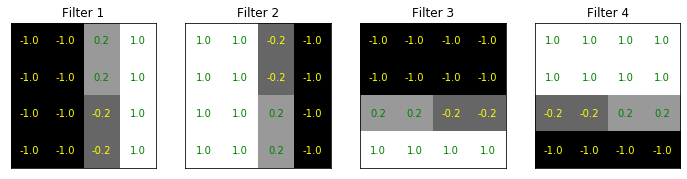

In [48]:
#visulize all filter according to their filter charactaristics
fig = plt.figure(figsize=(12,8))

for i in range(len(filters)):

  ax = fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
  ax.imshow(filters[i],cmap = 'gray')
  ax.set_title('Filter {}'.format(str(i+1)))
  width, height = filters[i].shape

  for x in range(width):
    for y in range(height):
      ax.annotate(str(filters[i][x][y]),xy = (y,x),
      horizontalalignment = 'center',
      verticalalignment = 'center',
      color = 'yellow' if filters[i][x][y]<0 else 'green')

Define Convolutional Layers

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [0]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

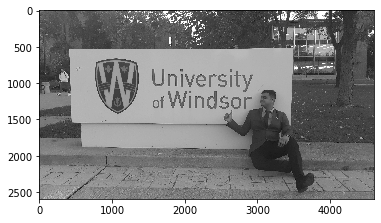

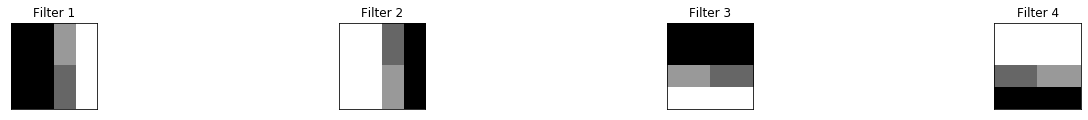

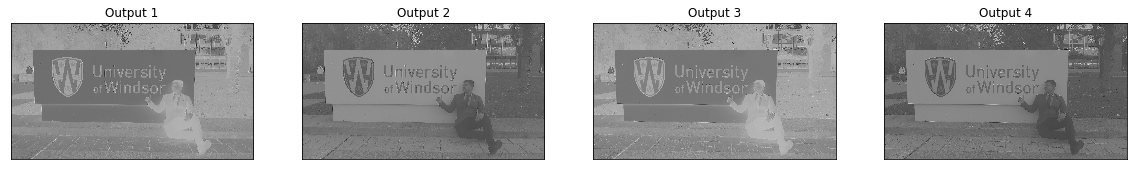

In [51]:
plt.imshow(gray_image, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_image_tensor = torch.from_numpy(gray_image).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_image_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

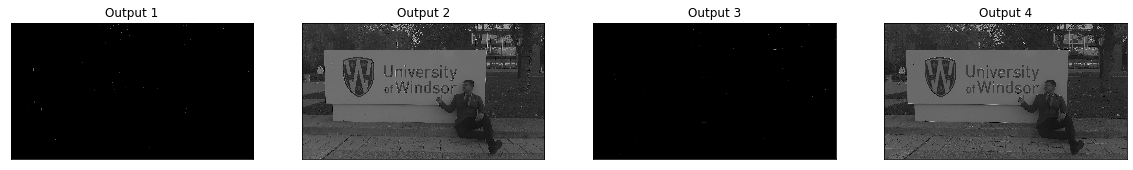

In [52]:
viz_layer(activated_layer)